# LINKS

- ## [join/merge DF python pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)


---

In [1]:
import os, sys, time
from time import sleep
from pathlib import Path
from datetime import datetime, timedelta

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pyodbc

In [3]:
from openpyxl import Workbook, load_workbook
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows

In [4]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
# [2020-02-19]]\\import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
[x for x in pyodbc.drivers() if x.startswith('Microsoft Access Driver')]

['Microsoft Access Driver (*.mdb, *.accdb)']

## *FUNCTIONS*

In [6]:
def send_mail(send_from, send_to, subject, message, files=[],
              server="cos.smtp.agilent.com", port=587, use_tls=True):  # {
    print("SENDING MAIL... DATE == " + str(pd.Timestamp.now())[:10])
    msg = MIMEMultipart()
    msg['From'] = send_from
    msg['To'] = COMMASPACE.join(send_to)
    msg['Date'] = formatdate(localtime=True)
    msg['Subject'] = subject

    msg.attach(MIMEText(message))

    for path in files:  # {
        part = MIMEBase('application', "octet-stream")
        with open(path, 'rb') as file:  # {
            part.set_payload(file.read())
        # }
        encoders.encode_base64(part)
        part.add_header('Content-Disposition',
                        'attachment; filename="{}"'.format(op.basename(path)))
        msg.attach(part)
    # }

    smtp = smtplib.SMTP(server, port)
    if use_tls:  # {
        smtp.starttls()
    # }
    smtp.sendmail(send_from, send_to, msg.as_string())
    smtp.quit()
# }

In [7]:
def pull_prodflow_data(table_name): # {
    pass
# }

In [8]:
def push_prodflow_data(table_name): # {
    pass
# }

## Ask for `Email Address`:

## Ask for `Date`:

In [9]:
date_input = input("Input a Date:")

Input a Date:2020-02-14


In [10]:
# the_date = pd.Timestamp.now()
test_date = pd.Timestamp(ts_input=str(date_input))
print(test_date)

2020-02-14 00:00:00


In [11]:
td_one_month_ago = test_date - pd.Timedelta(unit='M', value=1)
print(td_one_month_ago)

2020-01-14 13:30:54


C:\Users\derbates\miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [12]:
one_month_ago = test_date - timedelta(days = 30)

In [13]:
print("ONE MONTH AGO == " + str(one_month_ago))

ONE MONTH AGO == 2020-01-15 00:00:00


In [14]:
# DAILY METRICS
# df_week_range = pd.date_range(start=one_month_ago, end=test_date, freq="M-SAT")
df_month_range = pd.date_range(start=one_month_ago, end=test_date, freq='D') #, periods=30)

In [15]:
type(df_month_range)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
list(df_month_range)

[Timestamp('2020-01-15 00:00:00', freq='D'),
 Timestamp('2020-01-16 00:00:00', freq='D'),
 Timestamp('2020-01-17 00:00:00', freq='D'),
 Timestamp('2020-01-18 00:00:00', freq='D'),
 Timestamp('2020-01-19 00:00:00', freq='D'),
 Timestamp('2020-01-20 00:00:00', freq='D'),
 Timestamp('2020-01-21 00:00:00', freq='D'),
 Timestamp('2020-01-22 00:00:00', freq='D'),
 Timestamp('2020-01-23 00:00:00', freq='D'),
 Timestamp('2020-01-24 00:00:00', freq='D'),
 Timestamp('2020-01-25 00:00:00', freq='D'),
 Timestamp('2020-01-26 00:00:00', freq='D'),
 Timestamp('2020-01-27 00:00:00', freq='D'),
 Timestamp('2020-01-28 00:00:00', freq='D'),
 Timestamp('2020-01-29 00:00:00', freq='D'),
 Timestamp('2020-01-30 00:00:00', freq='D'),
 Timestamp('2020-01-31 00:00:00', freq='D'),
 Timestamp('2020-02-01 00:00:00', freq='D'),
 Timestamp('2020-02-02 00:00:00', freq='D'),
 Timestamp('2020-02-03 00:00:00', freq='D'),
 Timestamp('2020-02-04 00:00:00', freq='D'),
 Timestamp('2020-02-05 00:00:00', freq='D'),
 Timestamp

In [17]:
df_month_range = pd.DataFrame(pd.Series(df_month_range), columns=['QCDate'])

In [18]:
print(df_month_range)

       QCDate
0  2020-01-15
1  2020-01-16
2  2020-01-17
3  2020-01-18
4  2020-01-19
5  2020-01-20
6  2020-01-21
7  2020-01-22
8  2020-01-23
9  2020-01-24
10 2020-01-25
11 2020-01-26
12 2020-01-27
13 2020-01-28
14 2020-01-29
15 2020-01-30
16 2020-01-31
17 2020-02-01
18 2020-02-02
19 2020-02-03
20 2020-02-04
21 2020-02-05
22 2020-02-06
23 2020-02-07
24 2020-02-08
25 2020-02-09
26 2020-02-10
27 2020-02-11
28 2020-02-12
29 2020-02-13
30 2020-02-14


In [19]:
type(df_month_range)

pandas.core.frame.DataFrame

In [20]:
df_month_range.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 1 columns):
QCDate    31 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 376.0 bytes


In [21]:
# MONTHLY METRICS
year_range = pd.date_range(end=test_date, freq='M', periods=12, name='QCDate')

In [22]:
print(year_range)

DatetimeIndex(['2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31'],
              dtype='datetime64[ns]', name='QCDate', freq='M')


---
### create *connection string*

In [23]:
try: #{
    conn_str = (
        r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
        r'DBQ=C:\Users\derbates\OneDrive - Agilent Technologies\Desktop\Offline Prodflow II\Custom Quotes_fe.accdb;'
    )
#}
except: #{
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
#}
else: #{
    print("FIN...")
#}
try: #{
    cnxn = pyodbc.connect(conn_str)
    crsr = cnxn.cursor()
#}
except: #{
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
#}
else: #{
    print("FIN...")
#}

FIN...
FIN...


## `PRODUCTS` Table

In [24]:
# TRY THE FOLLOWING
try: # {
    df_products = pd.read_sql_query(sql='SELECT * FROM Products', con=cnxn)
# }
except: # {
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
# }
else: # {
    print("Operation Completed Successfully...")
    print(df_products.info())
    # [2020-02-25]\\print(products_info)
    # [2020-02-25]\\products_info.to_csv("products_INFO.csv", index=True)
# }

Operation Completed Successfully...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108217 entries, 0 to 108216
Data columns (total 42 columns):
ProductID          108217 non-null int64
Product#           108217 non-null object
ProductName        108189 non-null object
LineID             108217 non-null int64
Description        5973 non-null object
Specials           2443 non-null object
OriginationDate    107823 non-null datetime64[ns]
EntryDate          108215 non-null datetime64[ns]
Status             6036 non-null object
MatrixNumber       107333 non-null object
Components         108217 non-null int64
Availability       4843 non-null object
EquivalentSoln     102773 non-null object
EquivalentNeat     102931 non-null object
Packaging          107497 non-null object
Storage            100593 non-null object
ExpirationDate     108192 non-null float64
ShipType           95034 non-null object
UN#                93351 non-null object
ShipClass          87259 non-null object
PackGrp   

## `tblProdflow` Table

In [25]:
# TRY THE FOLLOWING
try: # {
    df_tblProdflow = pd.read_sql_query(sql='SELECT * FROM tblProdflow', 
                                       parse_dates = ['QCDate'],
                                       con=cnxn)
# }
except: # {
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
# }
else: # {
    print("Operation Completed Successfully...")
    print(df_tblProdflow.info())
    # [2020-02-25]\\print(tblProdflow_info)
    # [2020-02-25]\\tblProdflow_info.to_csv("tblProdflow_INFO.csv", index=True)
# }

Operation Completed Successfully...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108394 entries, 0 to 108393
Data columns (total 53 columns):
PfIDNo              108394 non-null int64
PfBatchID           108394 non-null object
ProductNo           108375 non-null object
OrdID               92262 non-null float64
QuoteNo             108358 non-null object
PfSentTo            108329 non-null object
PrepDate            107388 non-null datetime64[ns]
PrepVolume          108349 non-null float64
PrepUnit            108318 non-null object
PrepVessel          108315 non-null float64
PrepVBarcode        57709 non-null object
PrdSaleUnit         89200 non-null object
PrepMatrixNo        108319 non-null object
PrepMatrixLot       107452 non-null object
PrepInits           107211 non-null object
PrepMemo            61052 non-null object
PrepNotebookRef     48969 non-null object
BulkQCStatus        24 non-null object
BulkQCDate          74781 non-null datetime64[ns]
BulkPassFail        73889 no

### Rename Header Column in `Products` Table

In [26]:
df_products.rename(columns={'Product#': 'ProductNo'}, inplace=True)

In [27]:
df_products.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,MatrixNotes,RecipeId,RushPriority,IsVoided,SagePartNumber,ProductLevel,DateInserted,CofATemplate,UniqueRequestID,Test_Timestamp
38100,95848,ICUS-5910,Custom Standard,8,None,None,2017-04-04,2017-04-04,None,JHP-045,...,None,None,False,,ICUS-5910,1.0,NaT,GENERIC,None,b'\x00\x00\x00\x00\x00!x|'
80063,49093,QTE-49093,Custom Standard,7,None,None,2011-02-25,2011-05-09,None,JHP-031,...,None,RP-15780,False,VOID,None,3.0,NaT,None,None,b'\x00\x00\x00\x00\x00!\xab\x91'
12530,85174,CUS-19236,Custom Standard,7,None,None,2016-01-04,2016-01-04,None,JHP-003,...,None,RP-09473,False,VOID,None,1.0,NaT,GENERIC,None,b'\x00\x00\x00\x00\x00\x1f\xfb\xbb'
38212,96586,ICUS-6015,Custom Standard,8,None,None,2017-05-03,2017-05-03,None,JHP-330,...,None,None,False,VOID,None,1.0,NaT,GENERIC,None,b'\x00\x00\x00\x00\x00 [\x0e'
24021,1158,CUS-3154,Custom Standard,7,None,None,2003-03-06,2011-05-09,None,JHP-021,...,None,RP-12291,False,None,CUS-3154,1.0,NaT,GENERIC,None,b'\x00\x00\x00\x00\x00 #\x83'


---
## **CREATE** `df_QCMetrics` Table (calculations table)

In [28]:
#inner join in python pandas
df_QCMetrics = pd.merge(df_products, df_tblProdflow, on='ProductNo', how='right')
len(df_QCMetrics)

108394

In [29]:
# COPY FOR TESTING
TEST_METRICS = pd.DataFrame(data=df_QCMetrics)
TEST_METRICS.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
55821,84483.0,G2453-85060-1,Formic Acid Reagent Grade,9.0,None,None,2015-11-12,2015-11-12,None,JHP-035,...,2.0,535.0,None,2.0,None,False,False,None,None,None
76403,41521.0,PST-1900M100A01,Asana Standard,1.0,1 analyte @ 100 µg/mL in methanol (methyl alco...,None,2002-12-19,2011-05-09,active,JHP-021,...,2.0,31.0,None,2.0,None,False,False,None,None,None
101783,7721.0,WAT042876,Waters GPV Equivalency Calibration Solution,7.0,None,None,2001-06-12,2011-05-09,oem,JHP-021,...,1.0,NaN,None,2.0,None,False,True,None,None,None
83287,84262.0,PST-6250A1000,Topramezone Standard,7.0,None,None,2015-10-29,2015-10-29,None,JHP-003,...,2.0,NaN,None,2.0,None,False,False,None,None,None
97895,111152.0,STK-03692,CUS-00000822 Pesticides 20x in Acetone Stock A,16.0,None,None,2019-07-24,2019-07-24,None,JHP-001,...,2.0,NaN,None,2.0,None,False,False,None,None,None


### Drop **ALL** rows without a `QCDate` & `QCValidation` 

In [30]:
df_QCMetrics.dropna(axis=0, subset=['QCDate', 'QCValidation'], how='any', inplace=True)
# [2020-02-24]\\df_QCMetrics.dropna(axis=0, subset=['QCDate', 'ProductLevel'], how='any', inplace=True)
len(df_QCMetrics)

102902

In [31]:
type(df_month_range)

pandas.core.frame.DataFrame

#### TEST_METRICS (dataframe)

In [32]:
# CONVERT from string to datetime
TEST_METRICS['QCDate'] = pd.to_datetime(TEST_METRICS['QCDate'])

In [33]:
# CONVERT FROM string to categorical
TEST_METRICS['QCValidation'] = pd.Categorical(TEST_METRICS["QCValidation"], ordered=False)

In [34]:
# SET ['QCDate'] & ['QCValidation'] as the INDEX and delete COLUMNS
# [2020-02-24]\\TEST_METRICS.set_index([TEST_METRICS['QCDate'], TEST_METRICS['QCValidation']])
TEST_METRICS.index = [TEST_METRICS['QCDate'], TEST_METRICS['QCValidation']]
del TEST_METRICS['QCDate'], TEST_METRICS['QCValidation']
TEST_METRICS.sample(5)

,,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCFullValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
QCDate,QCValidation,,,,,,,,,,,,,,,,,,,,,
1998-09-28,2.0,6347.0,MISA-192-1,Base/Neutral Extractables Standard,1.0,16 analytes @ 100 µg/mL in methylene chloride ...,None,1999-01-20,2011-05-09,active,JHP-031,...,True,NaN,None,2.0,None,False,True,None,None,None
1996-01-25,2.0,7147.0,QTR-001B,Method 8270B Primary Calibration Standard Ampu...,7.0,None,None,1996-01-23,2011-05-09,custom,JHP-031,...,True,NaN,None,2.0,None,False,True,None,None,None
NaT,1.0,13794.0,CUS-6531,Custom Standard,7.0,None,None,2005-03-28,2005-03-28,None,JHP-303,...,False,NaN,None,1.0,None,False,False,None,None,None
2019-10-31,1.0,75925.0,PST-5975K1000,Picoxystrobin Standard,7.0,None,new pst,2014-09-15,2014-09-15,None,JHP-001,...,False,15.0,Quarantine cp-3060z (22) & cp-4041z (21) reta...,1.0,None,False,False,None,None,None
2010-12-28,1.0,41748.0,CUS-11684,Custom Standard,7.0,None,None,2010-01-14,2011-05-09,None,JHP-021,...,False,4.0,None,1.0,None,False,True,None,None,None


In [35]:
TEST_METRICS.groupby(TEST_METRICS.index)['PfBatchID'].count()

(1987-01-01 00:00:00, 1.0)     2
(1989-01-01 00:00:00, 1.0)     1
(1991-01-01 00:00:00, 1.0)     1
(1991-01-01 00:00:00, 2.0)     3
(1992-01-01 00:00:00, 1.0)     1
                              ..
(NaT, 0.0)                     2
(2020-02-13 00:00:00, 1.0)    33
(2020-02-13 00:00:00, 3.0)     1
(2020-02-14 00:00:00, 1.0)     4
(NaT, nan)                     1
Name: PfBatchID, Length: 11040, dtype: int64

In [36]:
try: # {
    TEST_METRICS.resample("D").count()
# }
except: # {
    print("FAIL!\n\nTypeError:\n\tOnly valid with:\n\t\tDatetimeIndex,\n\t\tTimedeltaIndex,\n\t\tPeriodIndex;\n\t\t\tbut got an instance of 'MultiIndex'")
# }

FAIL!

TypeError:
	Only valid with:
		DatetimeIndex,
		TimedeltaIndex,
		PeriodIndex;
			but got an instance of 'MultiIndex'


In [37]:
TEST_METRICS.to_csv("test_METRICS_index.csv", index=True)

---
# CHANGE `index` of `df_QCMetrics`:

---
## *BEFORE setting `index`:*

In [38]:
df_QCMetrics.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
52276,88315.0,DWM-591-1,Promulgated VOC Standard,7.0,None,None,2016-05-25,2016-05-25,None,JHP-021,...,2.0,60.0,zero out cc-0603a (60) stability,2.0,None,False,True,None,None,None
67845,6392.0,NPM-525C-1,Nitrogen/Phosphorous Pesticide Standard,1.0,40 analytes @ 100 µg/mL in acetone,None,1999-01-20,2011-05-09,active,JHP-001,...,2.0,67.0,None,2.0,None,False,False,None,None,None
6069,5524.0,8500-6917-5,Caffeine Standard #5 (50 µg/mL),7.0,None,agilent,1997-03-07,2004-03-30,oem,JHP-040,...,2.0,NaN,None,2.0,None,False,True,None,None,None
1322,69576.0,393734801-1,PPG Tuning Solution,7.0,None,None,2014-01-31,2014-01-31,None,JHP-027,...,2.0,141.0,None,2.0,None,False,False,None,None,None
32134,936.0,CUS-2693,Custom Standard,7.0,None,None,2003-02-06,2003-02-06,None,JHP-026,...,1.0,33.0,None,1.0,None,False,False,None,None,None


### Convert `QCMetrics`['QCDate'] from `str` to `datetime`

In [39]:
# Convert "QCMetrics"['QCDate'] from string to datetime
df_QCMetrics['QCDate'] = pd.to_datetime(df_QCMetrics['QCDate'])

### set `index` of `df_QCMetrics` to be `QCDate` (after changing `dtype`)

In [40]:
# set "QCmetrics""['QCDate'] as the index and delete column
df_QCMetrics.index = df_QCMetrics['QCDate']
del df_QCMetrics['QCDate']

---
## *AFTER setting `index`:*

In [41]:
df_QCMetrics.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
QCDate,,,,,,,,,,,,,,,,,,,,,
2013-07-01,65470.0,CUS-14843,Custom Standard,7.0,None,None,2013-06-13,2013-06-13,None,JHP-040,...,1.0,30.0,None,1.0,None,False,False,None,None,None
2014-12-02,77399.0,RBF-001M1000,Bromobenzene Standard,1.0,"1 analyte at 1,000 µg/mL in methanol",Cornell,2014-11-24,2014-11-24,active,JHP-021,...,2.0,12.0,None,2.0,None,False,False,None,None,None
2001-03-01,22320.0,CUS-912,Custom Standard,7.0,None,None,2006-11-07,2011-05-09,None,JHP-014,...,1.0,NaN,None,1.0,None,False,True,None,None,None
2005-04-07,13797.0,CUS-6505,Custom Standard,7.0,None,None,2005-03-29,2005-03-29,None,JHP-079,...,1.0,19.0,None,1.0,None,False,True,None,None,None
2017-01-16,93855.0,STK-03017,CUS-23096 Partial C 1000 µg/mL in Acetonitrile...,16.0,None,None,2017-01-13,2017-01-13,None,JHP-003,...,1.0,NaN,None,14.0,None,True,False,None,None,None


---
# create `df_last_month` DataFrame

---
### View Observations between One Month Ago and Today

In [42]:
df_last_month = df_QCMetrics[str(one_month_ago):str(test_date)]
len(df_last_month)
# [2020-02-22]\\df_last_month.to_csv("last_month.csv", index=True)

585

In [43]:
df_last_month.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
QCDate,,,,,,,,,,,,,,,,,,,,,
2020-01-16,70647.0,TFP-07-1,GB/T 23211 Standard no. 7,7.0,None,BID 140006,2014-02-20,2014-02-20,None,JHP-003,...,1.0,25.0,back up,1.0,None,False,False,None,None,None
2020-01-29,113026.0,STK-03762,5190-0494 100 µg/mL in Acetone Stock,16.0,None,None,2019-11-14,2019-11-14,None,JHP-001,...,1.0,NaN,no action,14.0,None,True,False,None,None,None
2020-02-13,41645.0,5190-0488-3,Enterprise Caffeine Standard - Cal #3 (2 µg/mL),7.0,None,Agilent Technologies,2010-01-07,2010-01-07,None,JHP-040,...,1.0,8028.0,None,1.0,None,False,False,None,None,None
2020-01-24,38873.0,ICUS-2679,Custom Standard,8.0,None,None,2009-07-22,2009-07-22,None,JHP-040,...,2.0,5.0,None,2.0,None,False,False,None,None,None
2020-01-29,96569.0,CUS-24616,Custom Standard,7.0,None,None,2017-05-03,2017-05-03,None,JHP-234,...,1.0,5.0,None,1.0,None,False,False,None,None,None


In [44]:
df_last_month.index

DatetimeIndex(['2020-01-28', '2020-02-07', '2020-01-30', '2020-01-30',
               '2020-02-05', '2020-01-16', '2020-01-15', '2020-02-13',
               '2020-01-15', '2020-01-15',
               ...
               '2020-01-22', '2020-01-22', '2020-02-11', '2020-02-04',
               '2020-01-29', '2020-01-17', '2020-01-22', '2020-02-06',
               '2020-02-07', '2020-01-31'],
              dtype='datetime64[ns]', name='QCDate', length=585, freq=None)

---
# create `df_daily_levels` frame

---

## GroupBy ([df_last_month.index, 'QCValidation'])['PfBatchID']

### TEST `CATEGORICAL-INDEX` BELOW:

In [45]:
''' Groupby single column in pandas python'''
df_last_month.groupby(df_last_month.index)['PfBatchID'].count()

QCDate
2020-01-15    19
2020-01-16    29
2020-01-17    17
2020-01-21    31
2020-01-22    43
2020-01-23    19
2020-01-24    24
2020-01-25     3
2020-01-27    35
2020-01-28    14
2020-01-29    24
2020-01-30    22
2020-01-31     8
2020-02-03    13
2020-02-04    33
2020-02-05    24
2020-02-06    42
2020-02-07    32
2020-02-08     2
2020-02-10    47
2020-02-11    41
2020-02-12    25
2020-02-13    34
2020-02-14     4
Name: PfBatchID, dtype: int64

In [46]:
''' Groupby multiple columns '''
df_daily_levels = pd.DataFrame(data=df_last_month.groupby([df_last_month.index,'QCValidation'])['PfBatchID'].count())
# [2020-02-24]\\f_daily_levels = pd.DataFrame(data=df_last_month.groupby([df_last_month.index, 'ProductLevel'])['PfBatchID'].count())
# RENAME COLUMNS
df_daily_levels.rename(columns={'PfBatchID': 'Count'}, inplace=True)
df_daily_levels

Count
QCDate     QCValidation       
2020-01-15 1.0              18
           2.0               1
2020-01-16 1.0              28
           2.0               1
2020-01-17 1.0              16
           2.0               1
2020-01-21 1.0              29
           2.0               2
2020-01-22 1.0              43
2020-01-23 1.0              18
           2.0               1
2020-01-24 1.0              23
           2.0               1
2020-01-25 1.0               3
2020-01-27 1.0              35
2020-01-28 1.0              14
2020-01-29 1.0              24
2020-01-30 1.0              21
           2.0               1
2020-01-31 1.0               8
2020-02-03 1.0              10
           2.0               1
           3.0               2
2020-02-04 1.0              33
2020-02-05 1.0              23
           3.0               1
2020-02-06 1.0              41
           3.0               1
2020-02-07 1.0              29
           2.0               3
2020-02-08 1.0               2
2020-02-10 1.0              47
2020-02-11 1.0              41
2020-02-12 1.0              25
2020-02-13 1.0              33
           3.0               1
2020-02-14 1.0               4

#### SORT INDEX

In [47]:
df_daily_levels.sort_index(inplace=True)
df_daily_levels

Count
QCDate     QCValidation       
2020-01-15 1.0              18
           2.0               1
2020-01-16 1.0              28
           2.0               1
2020-01-17 1.0              16
           2.0               1
2020-01-21 1.0              29
           2.0               2
2020-01-22 1.0              43
2020-01-23 1.0              18
           2.0               1
2020-01-24 1.0              23
           2.0               1
2020-01-25 1.0               3
2020-01-27 1.0              35
2020-01-28 1.0              14
2020-01-29 1.0              24
2020-01-30 1.0              21
           2.0               1
2020-01-31 1.0               8
2020-02-03 1.0              10
           2.0               1
           3.0               2
2020-02-04 1.0              33
2020-02-05 1.0              23
           3.0               1
2020-02-06 1.0              41
           3.0               1
2020-02-07 1.0              29
           2.0               3
2020-02-08 1.0               2
2020-02-10 1.0              47
2020-02-11 1.0              41
2020-02-12 1.0              25
2020-02-13 1.0              33
           3.0               1
2020-02-14 1.0               4

In [48]:
df_daily_levels.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 37 entries, (2020-01-15 00:00:00, 1.0) to (2020-02-14 00:00:00, 1.0)
Data columns (total 1 columns):
Count    37 non-null int64
dtypes: int64(1)
memory usage: 702.0 bytes


In [49]:
df_daily_levels.T

QCDate       2020-01-15     2020-01-16     2020-01-17     2020-01-21      \
QCValidation        1.0 2.0        1.0 2.0        1.0 2.0        1.0 2.0   
Count                18   1         28   1         16   1         29   2   

QCDate       2020-01-22 2020-01-23  ... 2020-02-06 2020-02-07     2020-02-08  \
QCValidation        1.0        1.0  ...        3.0        1.0 2.0        1.0   
Count                43         18  ...          1         29   3          2   

QCDate       2020-02-10 2020-02-11 2020-02-12 2020-02-13     2020-02-14  
QCValidation        1.0        1.0        1.0        1.0 3.0        1.0  
Count                47         41         25         33   1          4  

[1 rows x 37 columns]

In [50]:
df_daily_levels.T.to_csv("df_daily_levels_TRANPOSE.csv")

In [51]:
df_daily_levels.to_csv("df_daily_levels_2020_02_25.csv", index=True)

In [52]:
df_daily_levels.T.to_excel("df_daily_level_TRANPOSE.xlsx", index=True)

In [53]:
df_daily_levels.to_excel("df_daily_levels_2020_02_25.xlsx", index=True)

In [54]:
df_daily_levels.index

MultiIndex([('2020-01-15', 1.0),
            ('2020-01-15', 2.0),
            ('2020-01-16', 1.0),
            ('2020-01-16', 2.0),
            ('2020-01-17', 1.0),
            ('2020-01-17', 2.0),
            ('2020-01-21', 1.0),
            ('2020-01-21', 2.0),
            ('2020-01-22', 1.0),
            ('2020-01-23', 1.0),
            ('2020-01-23', 2.0),
            ('2020-01-24', 1.0),
            ('2020-01-24', 2.0),
            ('2020-01-25', 1.0),
            ('2020-01-27', 1.0),
            ('2020-01-28', 1.0),
            ('2020-01-29', 1.0),
            ('2020-01-30', 1.0),
            ('2020-01-30', 2.0),
            ('2020-01-31', 1.0),
            ('2020-02-03', 1.0),
            ('2020-02-03', 2.0),
            ('2020-02-03', 3.0),
            ('2020-02-04', 1.0),
            ('2020-02-05', 1.0),
            ('2020-02-05', 3.0),
            ('2020-02-06', 1.0),
            ('2020-02-06', 3.0),
            ('2020-02-07', 1.0),
            ('2020-02-07', 2.0),
          

---
### `.unstack()`

#### `unstack` *index* (axis=1)

In [55]:
df_daily_unstacked_1 = df_daily_levels.unstack(level=-1)
df_daily_unstacked_1

Count          
QCValidation   1.0  2.0  3.0
QCDate                      
2020-01-15    18.0  1.0  NaN
2020-01-16    28.0  1.0  NaN
2020-01-17    16.0  1.0  NaN
2020-01-21    29.0  2.0  NaN
2020-01-22    43.0  NaN  NaN
2020-01-23    18.0  1.0  NaN
2020-01-24    23.0  1.0  NaN
2020-01-25     3.0  NaN  NaN
2020-01-27    35.0  NaN  NaN
2020-01-28    14.0  NaN  NaN
2020-01-29    24.0  NaN  NaN
2020-01-30    21.0  1.0  NaN
2020-01-31     8.0  NaN  NaN
2020-02-03    10.0  1.0  2.0
2020-02-04    33.0  NaN  NaN
2020-02-05    23.0  NaN  1.0
2020-02-06    41.0  NaN  1.0
2020-02-07    29.0  3.0  NaN
2020-02-08     2.0  NaN  NaN
2020-02-10    47.0  NaN  NaN
2020-02-11    41.0  NaN  NaN
2020-02-12    25.0  NaN  NaN
2020-02-13    33.0  NaN  1.0
2020-02-14     4.0  NaN  NaN

In [56]:
df_daily_unstacked_1.to_csv("df_daily_levels_2020_02_25_UNSTACKED_level_1.csv", index=True)

In [57]:
df_daily_unstacked_1.to_excel("df_daily_levels_2020_02_25_UNSTACKED_level_1.xlsx", index=True)

In [70]:
len(df_daily_unstacked_1.columns.levels)

2

---
# DROP LEVEL

In [74]:
df_daily_unstacked_1.columns = df_daily_unstacked_1.columns.droplevel()

---

In [75]:
df_daily_unstacked_1

QCValidation,1.0,2.0,3.0
QCDate,,,
2020-01-15,18.0,1.0,NaN
2020-01-16,28.0,1.0,NaN
2020-01-17,16.0,1.0,NaN
2020-01-21,29.0,2.0,NaN
2020-01-22,43.0,NaN,NaN
2020-01-23,18.0,1.0,NaN
2020-01-24,23.0,1.0,NaN
2020-01-25,3.0,NaN,NaN
2020-01-27,35.0,NaN,NaN


In [76]:
df_daily_unstacked_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2020-01-15 to 2020-02-14
Data columns (total 3 columns):
1.0    24 non-null float64
2.0    9 non-null float64
3.0    4 non-null float64
dtypes: float64(3)
memory usage: 768.0 bytes


In [121]:
df_daily_unstacked_1.index

DatetimeIndex(['2020-01-15', '2020-01-16', '2020-01-17', '2020-01-21',
               '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14'],
              dtype='datetime64[ns]', name='QCDate', freq=None)

In [120]:
df_daily_unstacked_1.columns

Float64Index([1.0, 2.0, 3.0], dtype='float64', name='QCValidation')

In [81]:
df_daily_unstacked_1.to_excel("df_daily_unstacked_2020_02_25.xlsx", index=True)

### test `fillna()`

In [ ]:
df_daily_unstacked_1.fillna(value=0, inplace=True)

In [ ]:
df_daily_unstacked_1.sample(10)

### locate `values`:

In [ ]:
df_daily_unstacked_1.iloc[0, 0]

In [ ]:
df_daily_unstacked_1.iloc[17, 0]

---
# PLOT DATA

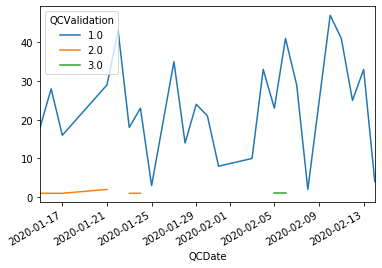

In [86]:
df_daily_unstacked_1.plot()

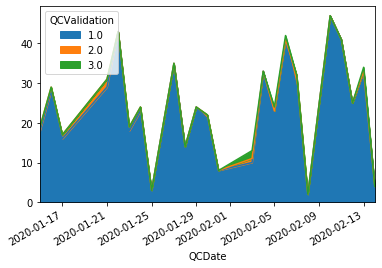

In [93]:
df_daily_unstacked_1.plot(kind='area')

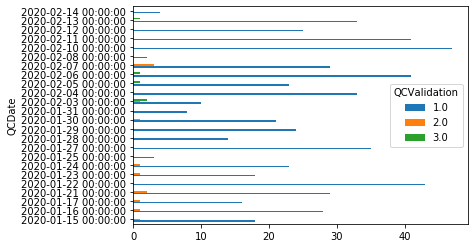

In [95]:
df_daily_unstacked_1.plot(kind='barh')

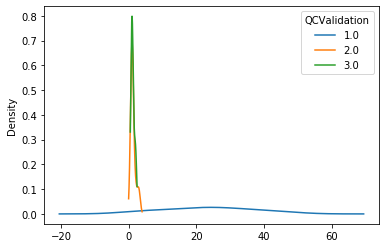

In [97]:
df_daily_unstacked_1.plot(kind='kde')

In [ ]:
kind : str
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot

In [134]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

---
# WorkBook

timestamp for filename

In [108]:
ts_str = str(pd.Timestamp.now())[:10]

create filename var

In [110]:
filename_str = str("QCMetrics_" + str(ts_str) + ".xlsx")

In [111]:
# CREATE NEW WORKBOOK
wb = Workbook()
wb.save(filename_str)

In [112]:
# LOAD EXISTING WORKBOOK
wb = load_workbook(filename_str)

In [118]:
# ADD SHEETS TO WORKBOOK
# DESGIGNATE SHEET NAME AND POSITION
sheet1 = wb.create_sheet('Table', 0)
sheet2 = wb.create_sheet('Graphs',1)

In [119]:
# ACTIVATE WORKSHEET TO WRITE DATAFRAME
active = wb['Table']

# WRTIE DATAFRAME TO ACTIVE WORKSHEET
for x in dataframe_to_rows(df_daily_unstacked_1): # {
    active.append(x)
# }

# SAVE 
wb.save(filename_str)

In [131]:
# CREATE DATASET
x = df_daily_unstacked_1.index
y = df_daily_unstacked_1.columns

ValueError: x and y must have same first dimension, but have shapes (24,) and (3,)

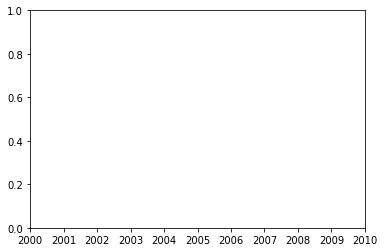

In [133]:
# CREATE AND SAVE PLOT AS PNG
plt.plot(x, y, kind='line')
plt.savefig(ts_str + "line_graph.png")

In [ ]:
# WRITE DATAFRAME TO ACTIVE WORKSHEET

---
# Create *empty* `DataFrame` to hold **FINAL** `Metrics` 
*(and lists to hold columns*)

In [98]:
QCMetrics_Month = pd.DataFrame(data=None,
                              index=pd.date_range(start=one_month_ago,
                                                 end=test_date,
                                                 freq='D',
                                                 name='QCDate'),
                              columns=pd.CategoricalIndex(['L1', 'L2', 'L3'], name='Levels')
                              )

In [99]:
QCMetrics_Month.index

DatetimeIndex(['2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18',
               '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14'],
              dtype='datetime64[ns]', name='QCDate', freq='D')

In [100]:
QCMetrics_Month.columns

CategoricalIndex(['L1', 'L2', 'L3'], categories=['L1', 'L2', 'L3'], ordered=False, name='Levels', dtype='category')

In [101]:
QCMetrics_Month

Levels,L1,L2,L3
QCDate,,,
2020-01-15,NaN,NaN,NaN
2020-01-16,NaN,NaN,NaN
2020-01-17,NaN,NaN,NaN
2020-01-18,NaN,NaN,NaN
2020-01-19,NaN,NaN,NaN
2020-01-20,NaN,NaN,NaN
2020-01-21,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN


In [102]:
df_daily_levels.head(5)

Count
QCDate     QCValidation       
2020-01-15 1.0              18
           2.0               1
2020-01-16 1.0              28
           2.0               1
2020-01-17 1.0              16

In [105]:
result = df_daily_levels.join(QCMetrics_Month, 
                              on = ['QCDate'],
                              how='inner', 
                              sort=True)

In [106]:
result

Count   L1   L2   L3
QCDate     QCValidation                      
2020-01-15 1.0              18  NaN  NaN  NaN
           2.0               1  NaN  NaN  NaN
2020-01-16 1.0              28  NaN  NaN  NaN
           2.0               1  NaN  NaN  NaN
2020-01-17 1.0              16  NaN  NaN  NaN
           2.0               1  NaN  NaN  NaN
2020-01-21 1.0              29  NaN  NaN  NaN
           2.0               2  NaN  NaN  NaN
2020-01-22 1.0              43  NaN  NaN  NaN
2020-01-23 1.0              18  NaN  NaN  NaN
           2.0               1  NaN  NaN  NaN
2020-01-24 1.0              23  NaN  NaN  NaN
           2.0               1  NaN  NaN  NaN
2020-01-25 1.0               3  NaN  NaN  NaN
2020-01-27 1.0              35  NaN  NaN  NaN
2020-01-28 1.0              14  NaN  NaN  NaN
2020-01-29 1.0              24  NaN  NaN  NaN
2020-01-30 1.0              21  NaN  NaN  NaN
           2.0               1  NaN  NaN  NaN
2020-01-31 1.0               8  NaN  NaN  NaN
2020-02-03 1.0              10  NaN  NaN  NaN
           2.0               1  NaN  NaN  NaN
           3.0               2  NaN  NaN  NaN
2020-02-04 1.0              33  NaN  NaN  NaN
2020-02-05 1.0              23  NaN  NaN  NaN
           3.0               1  NaN  NaN  NaN
2020-02-06 1.0              41  NaN  NaN  NaN
           3.0               1  NaN  NaN  NaN
2020-02-07 1.0              29  NaN  NaN  NaN
           2.0               3  NaN  NaN  NaN
2020-02-08 1.0               2  NaN  NaN  NaN
2020-02-10 1.0              47  NaN  NaN  NaN
2020-02-11 1.0              41  NaN  NaN  NaN
2020-02-12 1.0              25  NaN  NaN  NaN
2020-02-13 1.0              33  NaN  NaN  NaN
           3.0               1  NaN  NaN  NaN
2020-02-14 1.0               4  NaN  NaN  NaN

In [107]:
result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 37 entries, (2020-01-15 00:00:00, 1.0) to (2020-02-14 00:00:00, 1.0)
Data columns (total 4 columns):
Count    37 non-null int64
L1       0 non-null object
L2       0 non-null object
L3       0 non-null object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


---
# messups

---

# `ExcelWorkBook` functions

In [ ]:
# str for filename
filename_str = str(pd.Timestamp.now())[:10]
print(filename_str)

In [ ]:
# Create new workbook
wb = Workbook()

In [ ]:
# Add sheets to workbook
# Designate sheet name and position
sheet1 = wb.create_sheet('sheet1',0)
sheet2 = wb.create_sheet('sheet2',1)
sheet3 = wb.create_sheet('sheet3',2)

In [ ]:
# Activate worksheet to write dataframe
active = wb['sheet1']

# Write dataframe to active worksheet
for x in dataframe_to_rows(df_QCMetrics):
    active.append(x)

# Save workbook to write
wb.save(filepath)

In [ ]:
wb.save("QCMetrics-"  +  filename_str + ".xlsx")